# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow==1.15 tensorflow-gpu==1.15 stable-baselines gym-anytrading gym

In [ ]:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m",
    "pip", "install", "--user", "tensorflow==1.15.0"])

0

In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
print(tf.__version__)

1.15.0


In [ ]:
!pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip install numpy pandas matplotlib

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/data/gmedata.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 112.44000000000003, 'total_profit': 0.2779127440010439, 'position': 0}


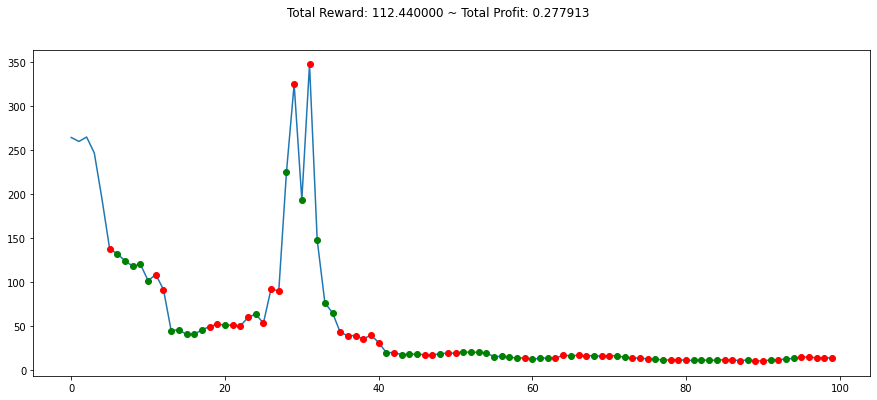

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=25000)

---------------------------------
| explained_variance | -5.5e+03 |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000537 |
---------------------------------
---------------------------------
| explained_variance | 0.000611 |
| fps                | 302      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.81e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.058    |
| fps                | 330      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.12     |
| fps                | 339      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.7944222506393862, 'position': 1}


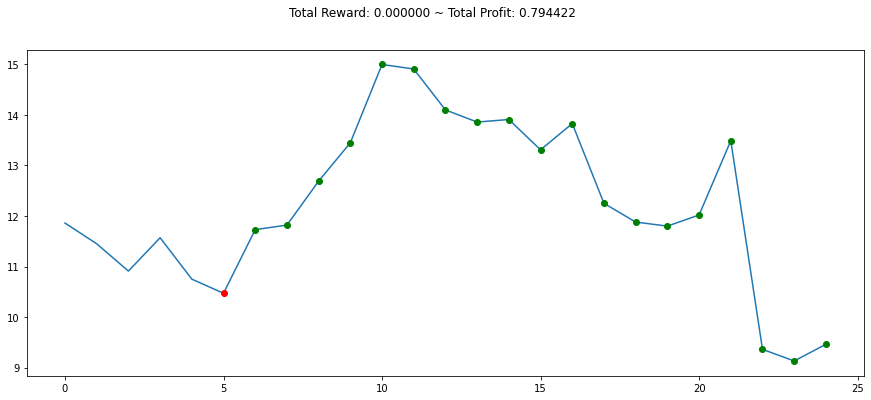

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import ACKTR

env_maker2 = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker2])

In [63]:
model = ACKTR('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=25000)





----------------------------------
| explained_variance | -0.000511 |
| fps                | 9         |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| policy_loss        | -15       |
| total_timesteps    | 20        |
| value_loss         | 1.02e+03  |
----------------------------------
----------------------------------
| explained_variance | -3.64     |
| fps                | 20        |
| nupdates           | 100       |
| policy_entropy     | 0.0166    |
| policy_loss        | -0.000358 |
| total_timesteps    | 2000      |
| value_loss         | 0.00954   |
----------------------------------
---------------------------------
| explained_variance | -195     |
| fps                | 19       |
| nupdates           | 200      |
| policy_entropy     | 0.0205   |
| policy_loss        | -0.00021 |
| total_timesteps    | 4000     |
| value_loss         | 1.2e-05  |
---------------------------------
---------------------------------
| explained_variance | 0.0

In [64]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


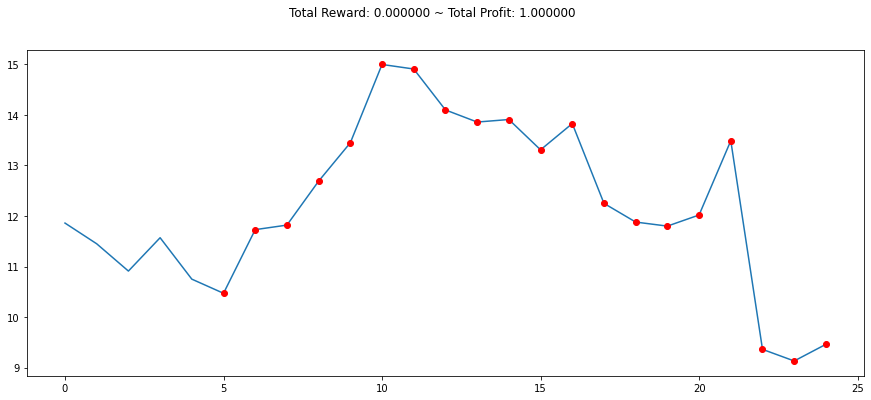

In [65]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()